In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score, recall_score, fbeta_score, confusion_matrix

In [ ]:
# Dataset source: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [ ]:
diabetes_df = pd.read_csv("diabetes_prediction_dataset.csv")
diabetes_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


## Data Exploration Steps to Do:

1. Check for any null values
2. Create data visualizations (histograms, box plots, bar graphs, etc.) to investigate distributions of the data


*   Overall Distribution of Data
*   Distribution of Data for Diabetics
*   Distribution of Data for Non-Diabetics

3. Create data visualization of people who have heart diesease of diabetes vs no diabetes





In [ ]:
diabetes_df.isna().any()

gender                 False
age                    False
hypertension           False
heart_disease          False
smoking_history        False
bmi                    False
HbA1c_level            False
blood_glucose_level    False
diabetes               False
dtype: bool

Text(0, 0.5, 'Frequency')

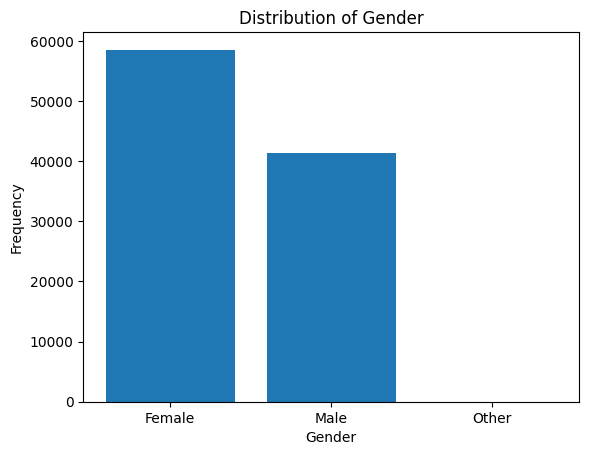

In [ ]:
gender_group = diabetes_df.groupby(['gender'])['heart_disease'].count()
plt.bar(gender_group.index, list(gender_group))
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

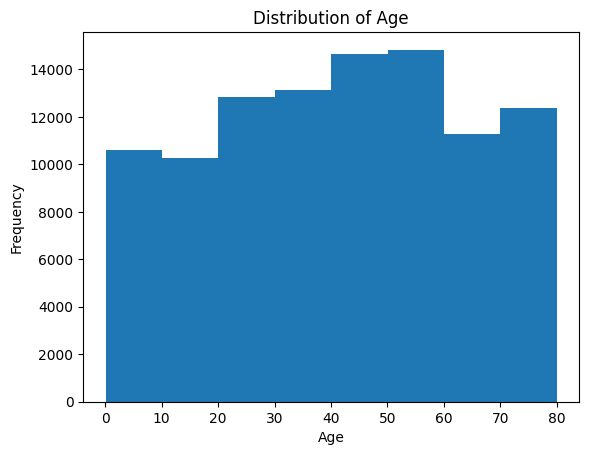

In [ ]:
plt.hist(diabetes_df['age'], bins=8)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0.5, 0, 'Age')

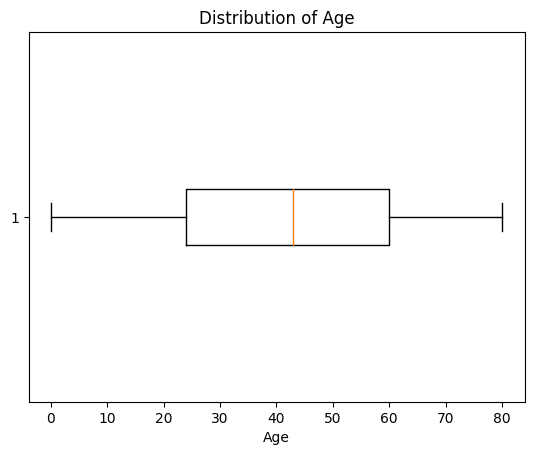

In [ ]:
plt.boxplot(diabetes_df['age'], vert=False)
plt.title('Distribution of Age')
plt.xlabel('Age')

Text(0, 0.5, 'Frequency')

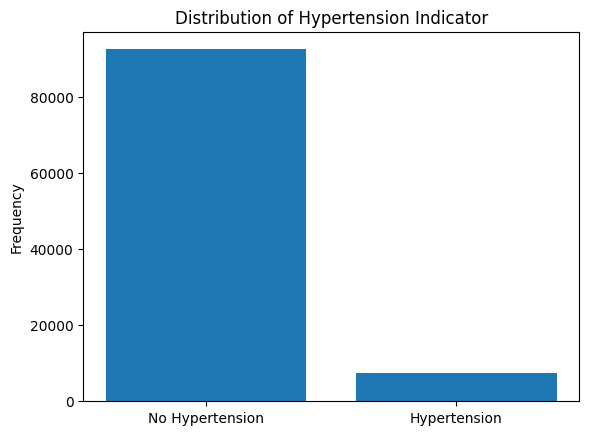

In [ ]:
hypertension_group = diabetes_df.groupby(['hypertension'])['heart_disease'].count()
plt.bar([0, 1], list(hypertension_group), tick_label=['No Hypertension', 'Hypertension'], align='center')
plt.title('Distribution of Hypertension Indicator')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

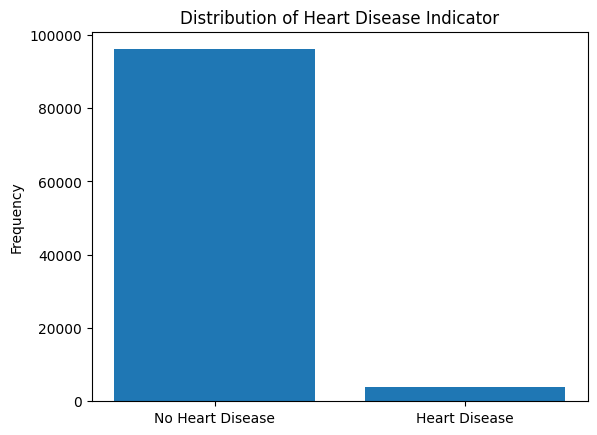

In [ ]:
heart_disease_group = diabetes_df.groupby(['heart_disease'])['diabetes'].count()
plt.bar([0, 1], list(heart_disease_group), tick_label=['No Heart Disease', 'Heart Disease'], align='center')
plt.title('Distribution of Heart Disease Indicator')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

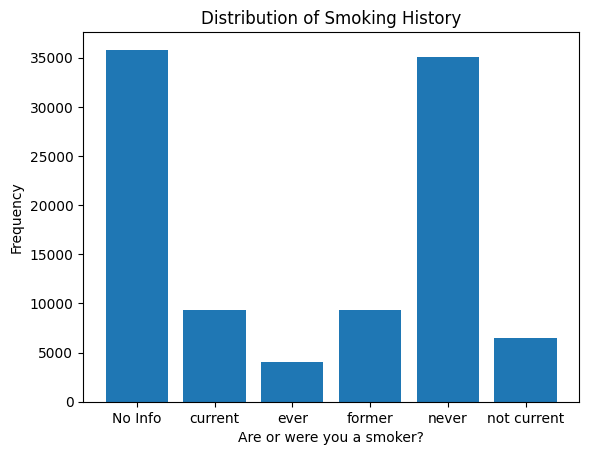

In [ ]:
smoking_group = diabetes_df.groupby(['smoking_history'])['heart_disease'].count()
plt.bar(smoking_group.index, list(smoking_group))
plt.title('Distribution of Smoking History')
plt.xlabel('Are or were you a smoker?')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

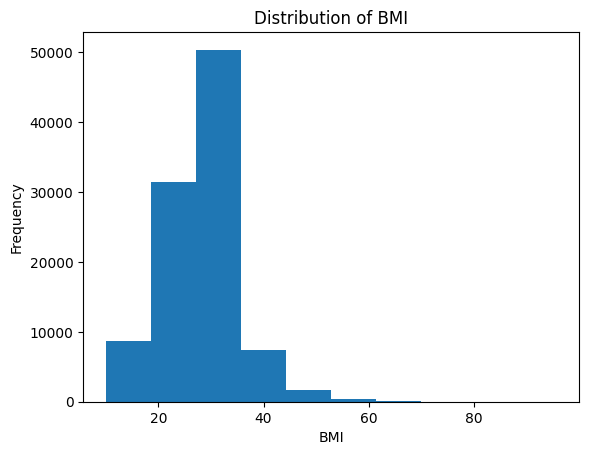

In [ ]:
plt.hist(diabetes_df['bmi'])
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

Text(0.5, 0, 'BMI')

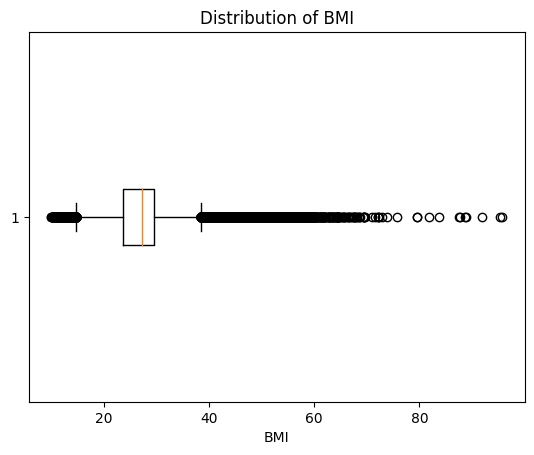

In [ ]:
plt.boxplot(diabetes_df['bmi'], vert=False)
plt.title('Distribution of BMI')
plt.xlabel('BMI')

Text(0, 0.5, 'Frequency')

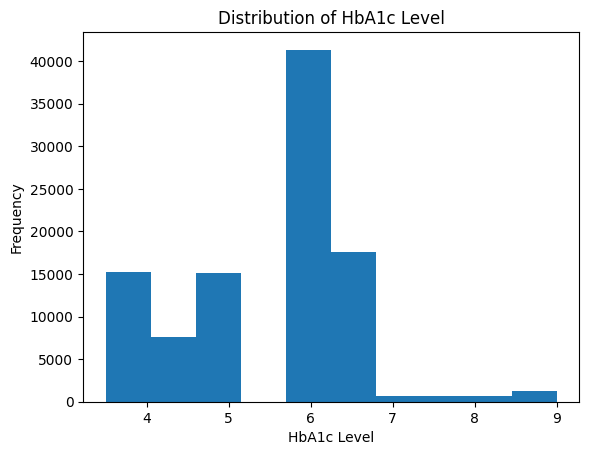

In [ ]:
plt.hist(diabetes_df['HbA1c_level'])
plt.title('Distribution of HbA1c Level')
plt.xlabel('HbA1c Level')
plt.ylabel('Frequency')

Text(0.5, 0, 'HbA1c Level')

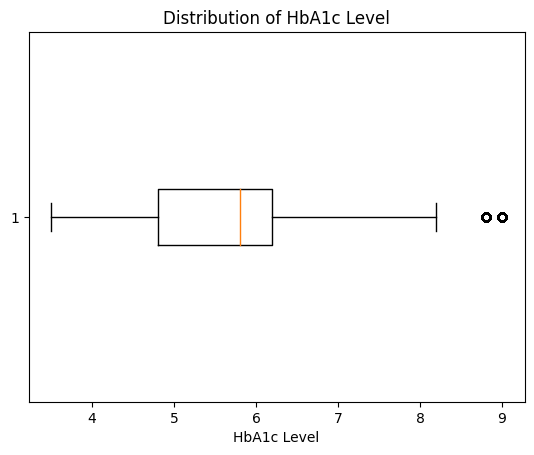

In [ ]:
plt.boxplot(diabetes_df['HbA1c_level'], vert=False)
plt.title('Distribution of HbA1c Level')
plt.xlabel('HbA1c Level')

Text(0, 0.5, 'Frequency')

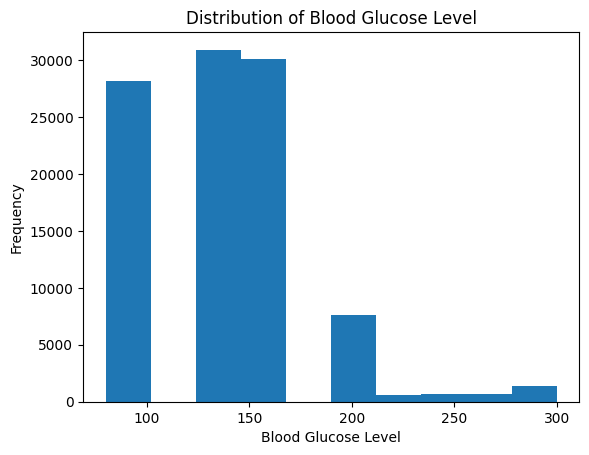

In [ ]:
plt.hist(diabetes_df['blood_glucose_level'])
plt.title('Distribution of Blood Glucose Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Frequency')

Text(0.5, 0, 'Blood Glucose Level')

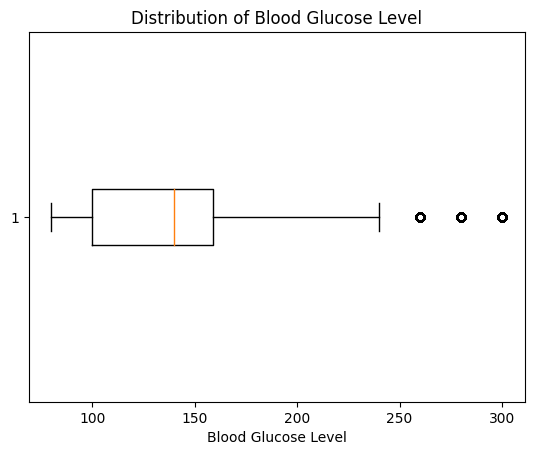

In [ ]:
plt.boxplot(diabetes_df['blood_glucose_level'], vert=False)
plt.title('Distribution of Blood Glucose Level')
plt.xlabel('Blood Glucose Level')

Text(0, 0.5, 'Frequency')

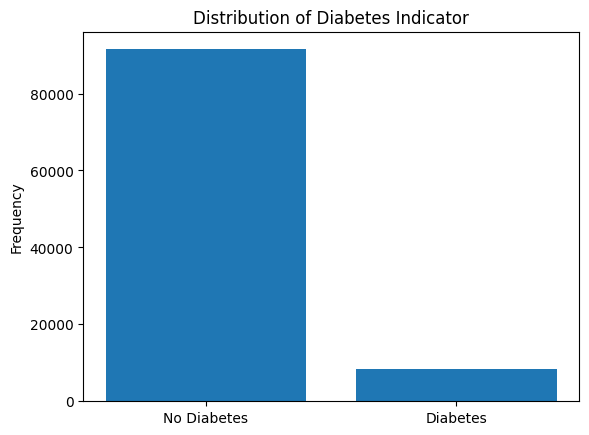

In [ ]:
diabetes_group = diabetes_df.groupby(['diabetes'])['heart_disease'].count()
plt.bar([0, 1], list(diabetes_group), tick_label=['No Diabetes', 'Diabetes'], align='center')
plt.title('Distribution of Diabetes Indicator')
plt.ylabel('Frequency')

In [ ]:
diabetics_group = diabetes_df[diabetes_df['diabetes'] == 1]
diabetics_group

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,Female,44.0,0,0,never,19.31,6.5,200,1
26,Male,67.0,0,1,not current,27.32,6.5,200,1
38,Male,50.0,1,0,current,27.32,5.7,260,1
40,Male,73.0,0,0,former,25.91,9.0,160,1
53,Female,53.0,0,0,former,27.32,7.0,159,1
...,...,...,...,...,...,...,...,...,...
99935,Female,65.0,1,1,never,33.55,8.2,140,1
99938,Male,55.0,0,1,former,30.42,6.2,300,1
99957,Female,61.0,0,0,No Info,34.45,6.5,280,1
99962,Female,58.0,1,0,never,38.31,7.0,200,1


Text(0, 0.5, 'Frequency')

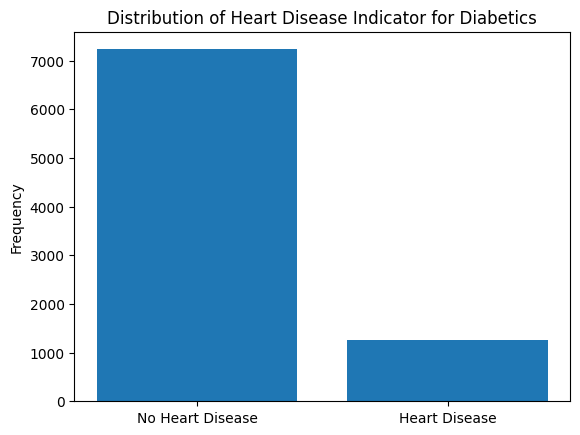

In [ ]:
heart_disease_group_diabetics = diabetics_group.groupby(['heart_disease'])['diabetes'].count()
plt.bar([0, 1], list(heart_disease_group_diabetics), tick_label=['No Heart Disease', 'Heart Disease'], align='center')
plt.title('Distribution of Heart Disease Indicator for Diabetics')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

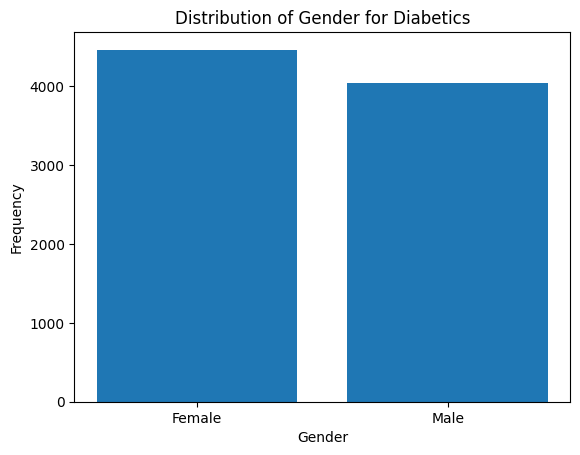

In [ ]:
gender_group_diabetics = diabetics_group.groupby(['gender'])['heart_disease'].count()
plt.bar(gender_group_diabetics.index, list(gender_group_diabetics))
plt.title('Distribution of Gender for Diabetics')
plt.xlabel('Gender')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

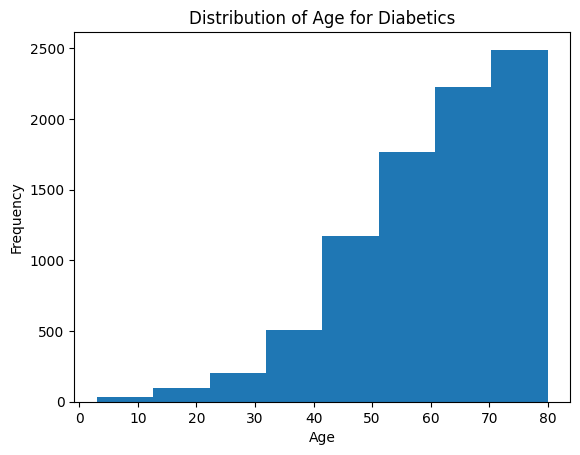

In [ ]:
plt.hist(diabetics_group['age'], bins=8)
plt.title('Distribution of Age for Diabetics')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0.5, 0, 'Age')

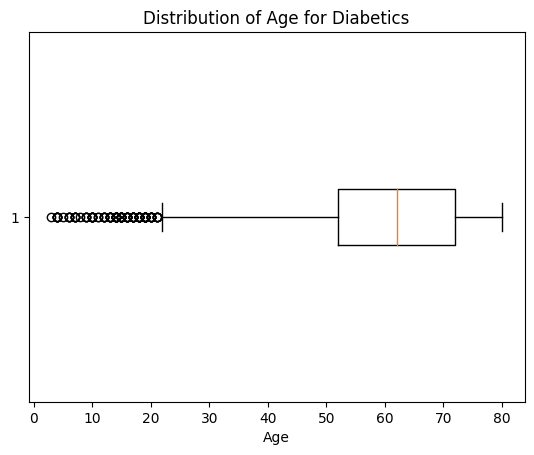

In [ ]:
plt.boxplot(diabetics_group['age'], vert=False)
plt.title('Distribution of Age for Diabetics')
plt.xlabel('Age')

Text(0, 0.5, 'Frequency')

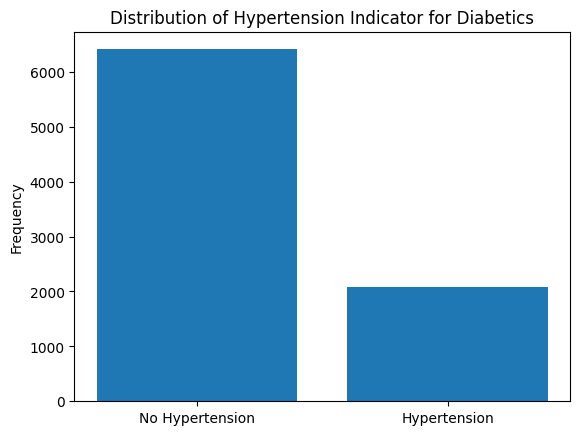

In [ ]:
hypertension_group_diabetics = diabetics_group.groupby(['hypertension'])['heart_disease'].count()
plt.bar([0, 1], list(hypertension_group_diabetics), tick_label=['No Hypertension', 'Hypertension'], align='center')
plt.title('Distribution of Hypertension Indicator for Diabetics')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

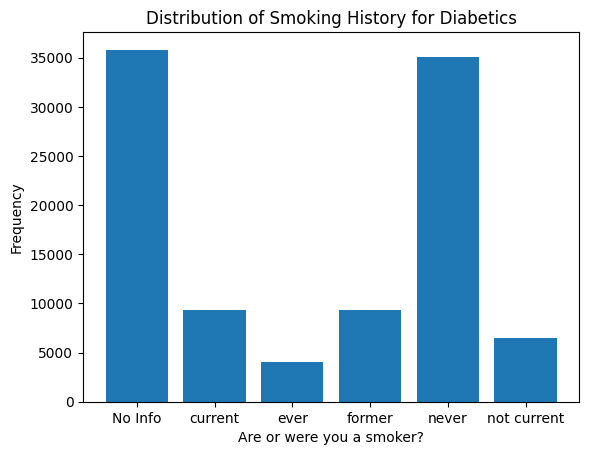

In [ ]:
smoking_group_diabetics = diabetics_group.groupby(['smoking_history'])['heart_disease'].count()
plt.bar(smoking_group_diabetics.index, list(smoking_group))
plt.title('Distribution of Smoking History for Diabetics')
plt.xlabel('Are or were you a smoker?')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

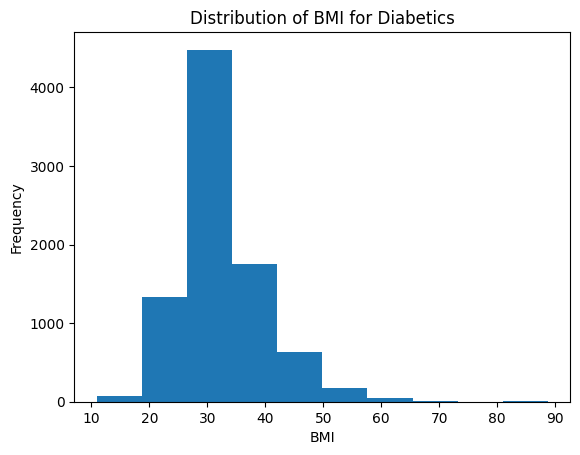

In [ ]:
plt.hist(diabetics_group['bmi'])
plt.title('Distribution of BMI for Diabetics')
plt.xlabel('BMI')
plt.ylabel('Frequency')

Text(0.5, 0, 'BMI')

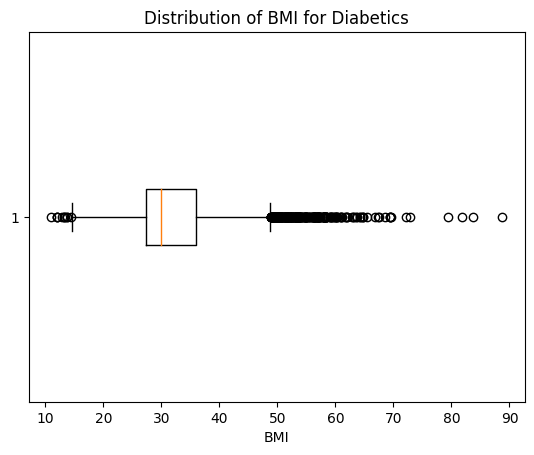

In [ ]:
plt.boxplot(diabetics_group['bmi'], vert=False)
plt.title('Distribution of BMI for Diabetics')
plt.xlabel('BMI')

Text(0, 0.5, 'Frequency')

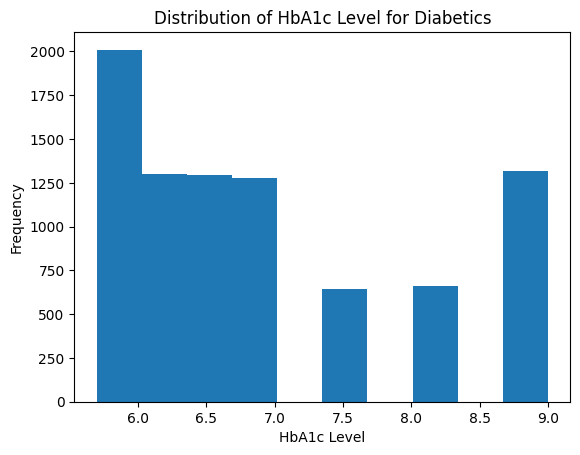

In [ ]:
plt.hist(diabetics_group['HbA1c_level'])
plt.title('Distribution of HbA1c Level for Diabetics')
plt.xlabel('HbA1c Level')
plt.ylabel('Frequency')

Text(0.5, 0, 'HbA1c Level')

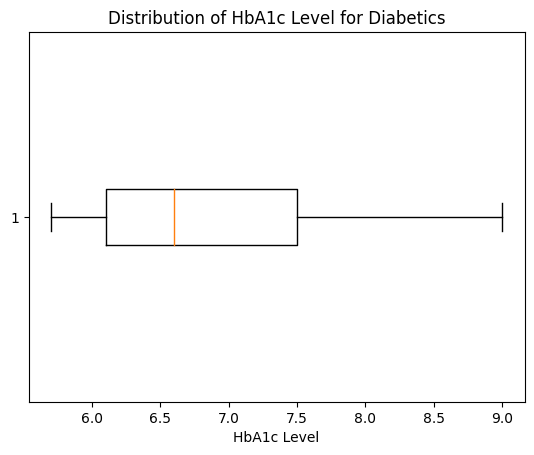

In [ ]:
plt.boxplot(diabetics_group['HbA1c_level'], vert=False)
plt.title('Distribution of HbA1c Level for Diabetics')
plt.xlabel('HbA1c Level')

Text(0, 0.5, 'Frequency')

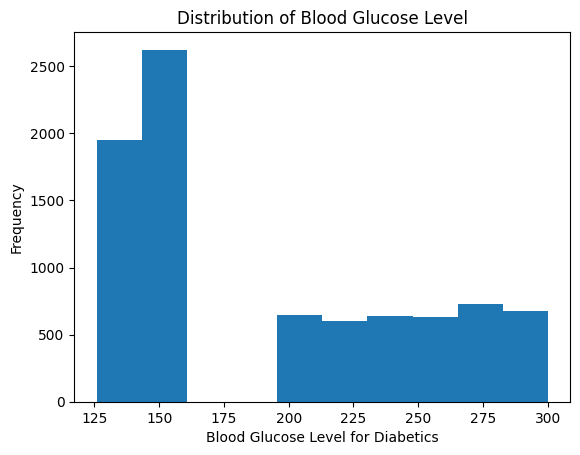

In [ ]:
plt.hist(diabetics_group['blood_glucose_level'])
plt.title('Distribution of Blood Glucose Level')
plt.xlabel('Blood Glucose Level for Diabetics')
plt.ylabel('Frequency')

Text(0.5, 0, 'Blood Glucose Level')

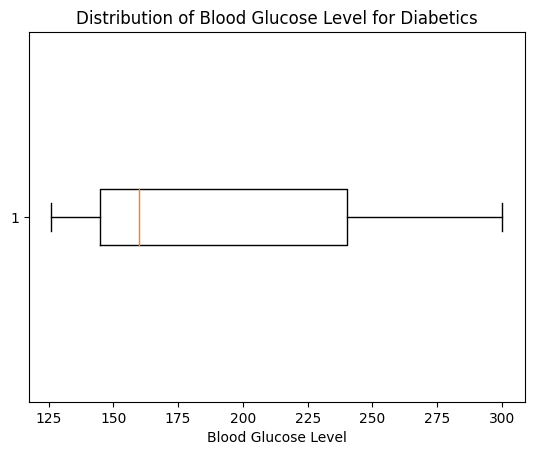

In [ ]:
plt.boxplot(diabetics_group['blood_glucose_level'], vert=False)
plt.title('Distribution of Blood Glucose Level for Diabetics')
plt.xlabel('Blood Glucose Level')

In [ ]:
non_diabetics_group = diabetes_df[diabetes_df['diabetes'] == 0]
non_diabetics_group

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


Text(0, 0.5, 'Frequency')

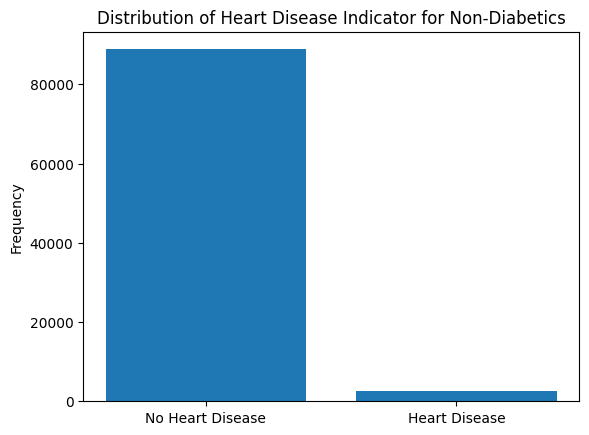

In [ ]:
heart_disease_group_non_diabetics = non_diabetics_group.groupby(['heart_disease'])['diabetes'].count()
plt.bar([0, 1], list(heart_disease_group_non_diabetics), tick_label=['No Heart Disease', 'Heart Disease'], align='center')
plt.title('Distribution of Heart Disease Indicator for Non-Diabetics')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

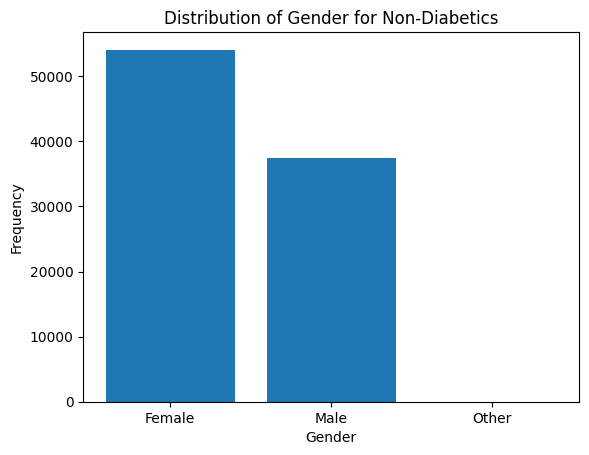

In [ ]:
gender_group_non_diabetics = non_diabetics_group.groupby(['gender'])['heart_disease'].count()
plt.bar(gender_group_non_diabetics.index, list(gender_group_non_diabetics))
plt.title('Distribution of Gender for Non-Diabetics')
plt.xlabel('Gender')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

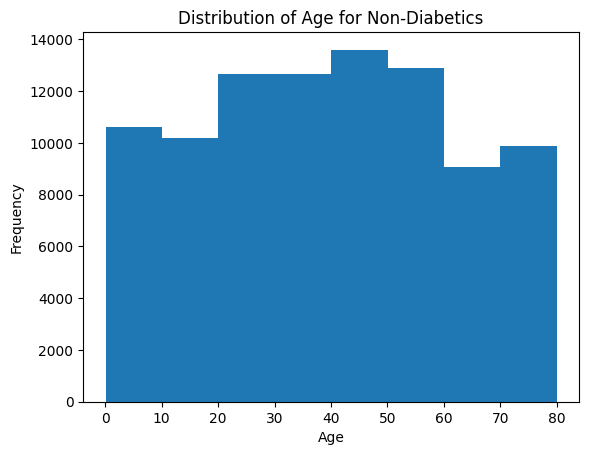

In [ ]:
plt.hist(non_diabetics_group['age'], bins=8)
plt.title('Distribution of Age for Non-Diabetics')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0.5, 0, 'Age')

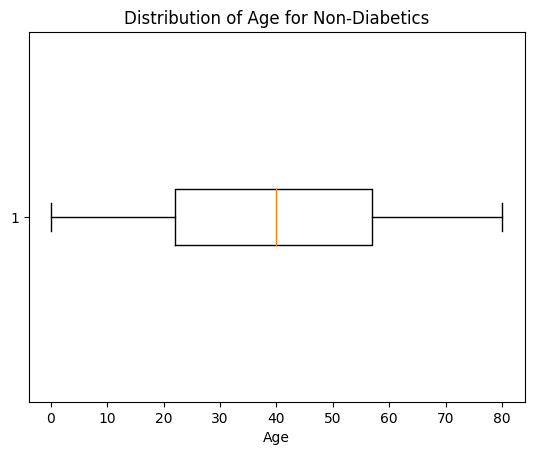

In [ ]:
plt.boxplot(non_diabetics_group['age'], vert=False)
plt.title('Distribution of Age for Non-Diabetics')
plt.xlabel('Age')

Text(0, 0.5, 'Frequency')

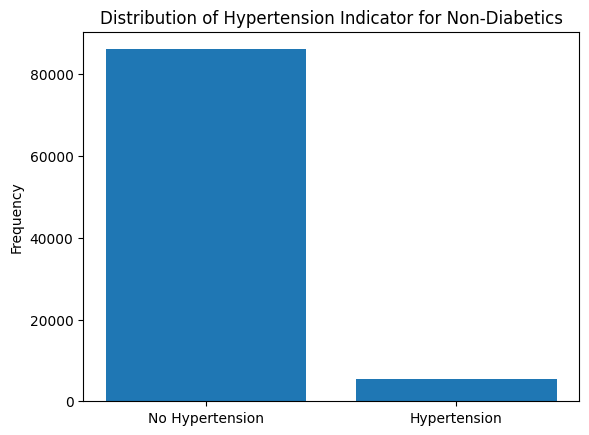

In [ ]:
hypertension_group_non_diabetics = non_diabetics_group.groupby(['hypertension'])['heart_disease'].count()
plt.bar([0, 1], list(hypertension_group_non_diabetics), tick_label=['No Hypertension', 'Hypertension'], align='center')
plt.title('Distribution of Hypertension Indicator for Non-Diabetics')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

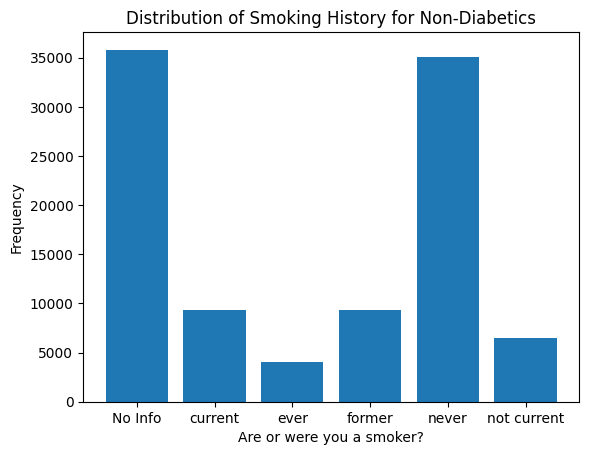

In [ ]:
smoking_group_non_diabetics = non_diabetics_group.groupby(['smoking_history'])['heart_disease'].count()
plt.bar(smoking_group_non_diabetics.index, list(smoking_group))
plt.title('Distribution of Smoking History for Non-Diabetics')
plt.xlabel('Are or were you a smoker?')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

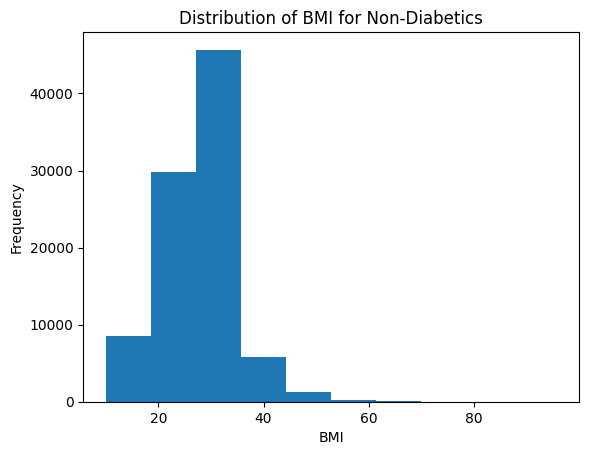

In [ ]:
plt.hist(non_diabetics_group['bmi'])
plt.title('Distribution of BMI for Non-Diabetics')
plt.xlabel('BMI')
plt.ylabel('Frequency')

Text(0.5, 0, 'BMI')

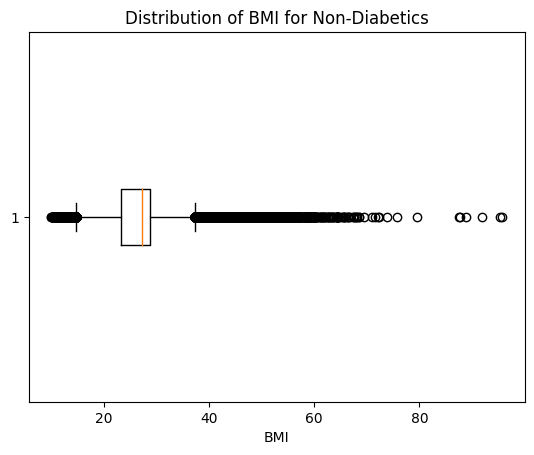

In [ ]:
plt.boxplot(non_diabetics_group['bmi'], vert=False)
plt.title('Distribution of BMI for Non-Diabetics')
plt.xlabel('BMI')

Text(0, 0.5, 'Frequency')

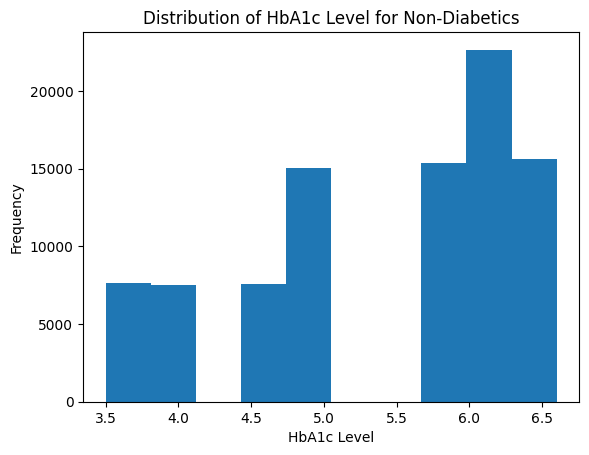

In [ ]:
plt.hist(non_diabetics_group['HbA1c_level'])
plt.title('Distribution of HbA1c Level for Non-Diabetics')
plt.xlabel('HbA1c Level')
plt.ylabel('Frequency')

Text(0.5, 0, 'HbA1c Level')

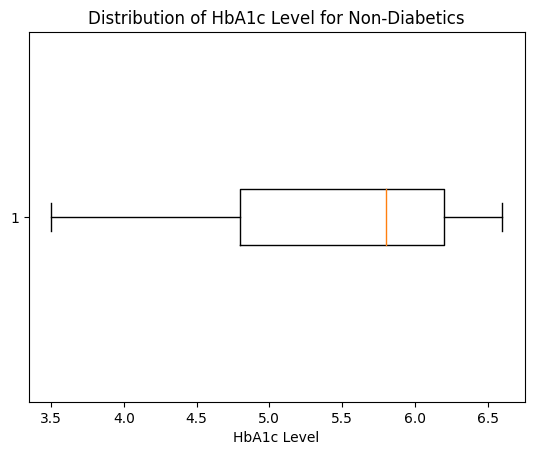

In [ ]:
plt.boxplot(non_diabetics_group['HbA1c_level'], vert=False)
plt.title('Distribution of HbA1c Level for Non-Diabetics')
plt.xlabel('HbA1c Level')

Text(0, 0.5, 'Frequency')

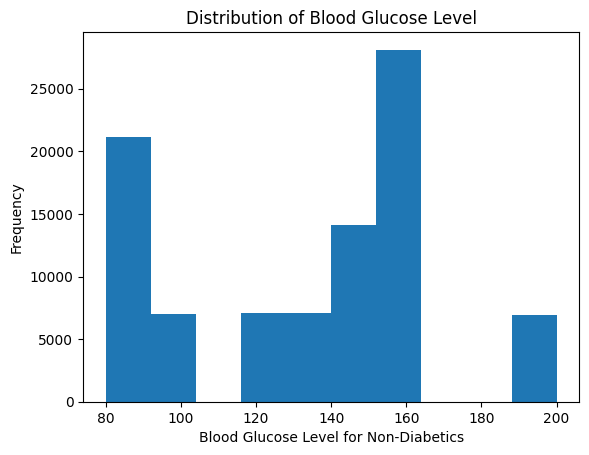

In [ ]:
plt.hist(non_diabetics_group['blood_glucose_level'])
plt.title('Distribution of Blood Glucose Level')
plt.xlabel('Blood Glucose Level for Non-Diabetics')
plt.ylabel('Frequency')

Text(0.5, 0, 'Blood Glucose Level')

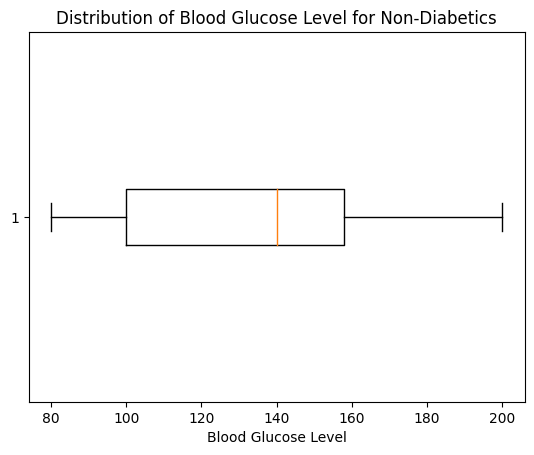

In [ ]:
plt.boxplot(non_diabetics_group['blood_glucose_level'], vert=False)
plt.title('Distribution of Blood Glucose Level for Non-Diabetics')
plt.xlabel('Blood Glucose Level')

In [ ]:
heart_disease = diabetes_df[diabetes_df['heart_disease'] == 1]
heart_disease

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
23,Female,72.0,0,1,former,27.94,6.5,130,0
26,Male,67.0,0,1,not current,27.32,6.5,200,1
42,Female,77.0,1,1,never,32.02,5.0,159,0
...,...,...,...,...,...,...,...,...,...
99826,Male,63.0,0,1,No Info,27.32,6.6,300,1
99848,Male,80.0,1,1,former,28.79,5.8,90,0
99912,Male,80.0,0,1,former,27.32,5.0,140,0
99935,Female,65.0,1,1,never,33.55,8.2,140,1


Text(0, 0.5, 'Frequency')

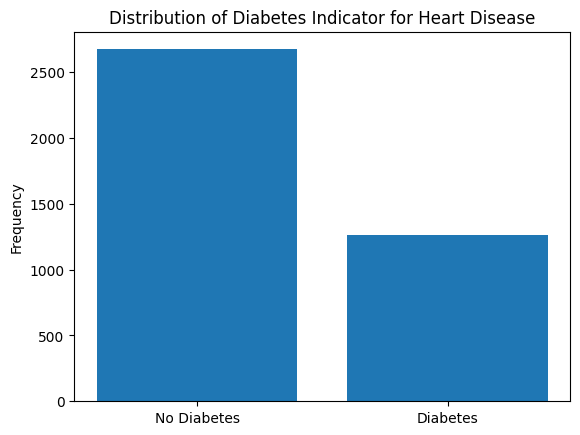

In [ ]:
diabetes_dist_heart_disease = heart_disease.groupby(['diabetes'])['heart_disease'].count()
plt.bar([0, 1], list(diabetes_dist_heart_disease), tick_label=['No Diabetes', 'Diabetes'], align='center')
plt.title('Distribution of Diabetes Indicator for Heart Disease')
plt.ylabel('Frequency')

## Data Wrangling and Cleaning Steps to Do:

1. One-Hot Encode gender and smoking_history features
2. Convert age from float type to int type
3. (Maybe) Normalize continuous data (eg BMI, HbA!c_level, blood_glucose_level)

In [ ]:
gender_dummies = pd.get_dummies(diabetes_df['gender'])
gender_dummies

,Female,Male,Other
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
99995,1,0,0
99996,1,0,0
99997,0,1,0
99998,1,0,0


In [ ]:
diabetes_df['Female'] = gender_dummies['Female']
diabetes_df['Male'] = gender_dummies['Male']
diabetes_df['Other'] = gender_dummies['Other']
diabetes_df.drop(['gender'], axis=1, inplace=True)
diabetes_df

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male,Other
0,80.0,0,1,never,25.19,6.6,140,0,1,0,0
1,54.0,0,0,No Info,27.32,6.6,80,0,1,0,0
2,28.0,0,0,never,27.32,5.7,158,0,0,1,0
3,36.0,0,0,current,23.45,5.0,155,0,1,0,0
4,76.0,1,1,current,20.14,4.8,155,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,No Info,27.32,6.2,90,0,1,0,0
99996,2.0,0,0,No Info,17.37,6.5,100,0,1,0,0
99997,66.0,0,0,former,27.83,5.7,155,0,0,1,0
99998,24.0,0,0,never,35.42,4.0,100,0,1,0,0


In [ ]:
smoking_dummies = pd.get_dummies(diabetes_df['smoking_history'])
smoking_dummies

,No Info,current,ever,former,never,not current
0,0,0,0,0,1,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
99995,1,0,0,0,0,0
99996,1,0,0,0,0,0
99997,0,0,0,1,0,0
99998,0,0,0,0,1,0


In [ ]:
diabetes_df['No Info'] = smoking_dummies['No Info']
diabetes_df['current'] = smoking_dummies['current']
diabetes_df['ever'] = smoking_dummies['ever']
diabetes_df['former'] = smoking_dummies['former']
diabetes_df['never'] = smoking_dummies['never']
diabetes_df['not current'] = smoking_dummies['not current']
diabetes_df.drop(['smoking_history'], axis=1, inplace=True)
diabetes_df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male,Other,No Info,current,ever,former,never,not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,1,0,0,1,0,0,0,0,0
99996,2.0,0,0,17.37,6.5,100,0,1,0,0,1,0,0,0,0,0
99997,66.0,0,0,27.83,5.7,155,0,0,1,0,0,0,0,1,0,0
99998,24.0,0,0,35.42,4.0,100,0,1,0,0,0,0,0,0,1,0


In [ ]:
diabetes_df['age'] = diabetes_df['age'].astype('int64')
diabetes_df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male,Other,No Info,current,ever,former,never,not current
0,80,0,1,25.19,6.6,140,0,1,0,0,0,0,0,0,1,0
1,54,0,0,27.32,6.6,80,0,1,0,0,1,0,0,0,0,0
2,28,0,0,27.32,5.7,158,0,0,1,0,0,0,0,0,1,0
3,36,0,0,23.45,5.0,155,0,1,0,0,0,1,0,0,0,0
4,76,1,1,20.14,4.8,155,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80,0,0,27.32,6.2,90,0,1,0,0,1,0,0,0,0,0
99996,2,0,0,17.37,6.5,100,0,1,0,0,1,0,0,0,0,0
99997,66,0,0,27.83,5.7,155,0,0,1,0,0,0,0,1,0,0
99998,24,0,0,35.42,4.0,100,0,1,0,0,0,0,0,0,1,0


In [ ]:
diabetes_X = diabetes_df.drop(['diabetes'], axis=1)
diabetes_X

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,Female,Male,Other,No Info,current,ever,former,never,not current
0,80,0,1,25.19,6.6,140,1,0,0,0,0,0,0,1,0
1,54,0,0,27.32,6.6,80,1,0,0,1,0,0,0,0,0
2,28,0,0,27.32,5.7,158,0,1,0,0,0,0,0,1,0
3,36,0,0,23.45,5.0,155,1,0,0,0,1,0,0,0,0
4,76,1,1,20.14,4.8,155,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80,0,0,27.32,6.2,90,1,0,0,1,0,0,0,0,0
99996,2,0,0,17.37,6.5,100,1,0,0,1,0,0,0,0,0
99997,66,0,0,27.83,5.7,155,0,1,0,0,0,0,1,0,0
99998,24,0,0,35.42,4.0,100,1,0,0,0,0,0,0,1,0


In [ ]:
diabetes_y = diabetes_df['diabetes']
diabetes_y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [ ]:
heart_disease_X = diabetes_df.drop(['heart_disease'], axis=1)
heart_disease_X

,age,hypertension,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male,Other,No Info,current,ever,former,never,not current
0,80,0,25.19,6.6,140,0,1,0,0,0,0,0,0,1,0
1,54,0,27.32,6.6,80,0,1,0,0,1,0,0,0,0,0
2,28,0,27.32,5.7,158,0,0,1,0,0,0,0,0,1,0
3,36,0,23.45,5.0,155,0,1,0,0,0,1,0,0,0,0
4,76,1,20.14,4.8,155,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80,0,27.32,6.2,90,0,1,0,0,1,0,0,0,0,0
99996,2,0,17.37,6.5,100,0,1,0,0,1,0,0,0,0,0
99997,66,0,27.83,5.7,155,0,0,1,0,0,0,0,1,0,0
99998,24,0,35.42,4.0,100,0,1,0,0,0,0,0,0,1,0


In [ ]:
heart_disease_y = diabetes_df['heart_disease']
heart_disease_y

0        1
1        0
2        0
3        0
4        1
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: heart_disease, Length: 100000, dtype: int64

## Data Modeling

We want to predict diabetes and investigate the features that determines diabetes and their influences on the outcome. This is a classification problem.

Questions:

1. (Main question) What are the features that influence diabetes and how much influence do these features have?

2. (Main question) Given values of all features, what is the probabilistic chance a person will get diabetes?

3. (Next step) What are the features that influence heart disease and how much influence do these features have?

4. (Next step) How does diabetes influence the risk of heart disease?

Novel Contributions:

1. Calculating probability risk of developing diabetes given the values of features

2. Determining how other diseases and health conditions such as heart disease plays a role in diabetes (and vice versa)

### Diabetes Splitting Dataset

In [ ]:
X_train, X_val_test, y_train, y_val_test = train_test_split(diabetes_X, diabetes_y, test_size=0.20, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_val_test, y_val_test, test_size=0.50, random_state=42)

### Baseline Models (Diabetes)

Baseline Models with no hyperparameter tuning

1. Logistic Regression
2. Random Forests
3. XGBoost
4. CATBoost
5. LightGBM
6. Gradient Boosted Trees

In [ ]:
from sklearn.linear_model import LogisticRegression

baseline_lr = LogisticRegression().fit(X_train, y_train)

valid_acc_score = baseline_lr.score(X_valid, y_valid)
valid_roc_auc_score = roc_auc_score(y_valid, baseline_lr.predict_proba(X_valid)[:, 1])
valid_precision_score = precision_score(y_valid, baseline_lr.predict(X_valid))
valid_recall_score = recall_score(y_valid, baseline_lr.predict(X_valid))
valid_fbeta_score = fbeta_score(y_valid, baseline_lr.predict(X_valid), beta=2)

test_acc_score = baseline_lr.score(X_test, y_test)
test_roc_auc_score = roc_auc_score(y_test, baseline_lr.predict_proba(X_test)[:, 1])
test_precision_score = precision_score(y_test, baseline_lr.predict(X_test))
test_recall_score = recall_score(y_test, baseline_lr.predict(X_test))
test_fbeta_score = fbeta_score(y_test, baseline_lr.predict(X_test), beta=2)

print("Validation Accuracy Score: " + str(valid_acc_score))
print("Validation ROC-AUC Score: " + str(valid_roc_auc_score))
print("Validation Precision Score: " + str(valid_precision_score))
print("Validation Recall Score: " + str(valid_recall_score))
print("Validation f-Beta Score: " + str(valid_fbeta_score))
print("")
print("Testing Accuracy Score: " + str(test_acc_score))
print("Testing ROC-AUC Score: " + str(test_roc_auc_score))
print("Testing Precision Score: " + str(test_precision_score))
print("Testing Recall Score: " + str(test_recall_score))
print("Testing f-Beta Score: " + str(test_fbeta_score))
print(X_test)
print(baseline_lr.predict_proba(X_test))
print(confusion_matrix(y_test, baseline_lr.predict(X_test)))

Validation Accuracy Score: 0.9587
Validation ROC-AUC Score: 0.9598828848335214
Validation Precision Score: 0.8661016949152542
Validation Recall Score: 0.6047337278106509
Validation f-Beta Score: 0.6435768261964736

Testing Accuracy Score: 0.9582
Testing ROC-AUC Score: 0.9623391502417619
Testing Precision Score: 0.8594507269789984
Testing Recall Score: 0.6164542294322132
Testing f-Beta Score: 0.6534021125030706
       age  hypertension  heart_disease    bmi  HbA1c_level  \
86525   53             0              0  32.90          6.6   
4024    18             0              0  21.53          5.8   
4731     2             0              0  27.32          6.6   
46016   78             0              1  23.69          5.8   
46674   36             0              0  27.32          6.1   
...    ...           ...            ...    ...          ...   
61984   11             0              0  27.32          6.2   
43471   58             0              0  22.57          3.5   
92524   53         

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

baseline_rf = RandomForestClassifier().fit(X_train, y_train)

valid_acc_score = baseline_rf.score(X_valid, y_valid)
valid_roc_auc_score = roc_auc_score(y_valid, baseline_rf.predict_proba(X_valid)[:, 1])
valid_precision_score = precision_score(y_valid, baseline_rf.predict(X_valid))
valid_recall_score = recall_score(y_valid, baseline_rf.predict(X_valid))
valid_fbeta_score = fbeta_score(y_valid, baseline_rf.predict(X_valid), beta=2)

test_acc_score = baseline_rf.score(X_test, y_test)
test_roc_auc_score = roc_auc_score(y_test, baseline_rf.predict_proba(X_test)[:, 1])
test_precision_score = precision_score(y_test, baseline_rf.predict(X_test))
test_recall_score = recall_score(y_test, baseline_rf.predict(X_test))
test_fbeta_score = fbeta_score(y_test, baseline_rf.predict(X_test), beta=2)

print("Validation Accuracy Score: " + str(valid_acc_score))
print("Validation ROC-AUC Score: " + str(valid_roc_auc_score))
print("Validation Precision Score: " + str(valid_precision_score))
print("Validation Recall Score: " + str(valid_recall_score))
print("Validation f-Beta Score: " + str(valid_fbeta_score))
print("")
print("Testing Accuracy Score: " + str(test_acc_score))
print("Testing ROC-AUC Score: " + str(test_roc_auc_score))
print("Testing Precision Score: " + str(test_precision_score))
print("Testing Recall Score: " + str(test_recall_score))
print("Testing f-Beta Score: " + str(test_fbeta_score))
print(X_test)
print(baseline_rf.predict_proba(X_test))
print(confusion_matrix(y_test, baseline_rf.predict(X_test)))

Validation Accuracy Score: 0.9689
Validation ROC-AUC Score: 0.9594967667294686
Validation Precision Score: 0.9494949494949495
Validation Recall Score: 0.6674556213017752
Validation f-Beta Score: 0.7096124811273277

Testing Accuracy Score: 0.9713
Testing ROC-AUC Score: 0.964906671725914
Testing Precision Score: 0.9472049689440993
Testing Recall Score: 0.7068366164542295
Testing f-Beta Score: 0.7446289062500001
       age  hypertension  heart_disease    bmi  HbA1c_level  \
86525   53             0              0  32.90          6.6   
4024    18             0              0  21.53          5.8   
4731     2             0              0  27.32          6.6   
46016   78             0              1  23.69          5.8   
46674   36             0              0  27.32          6.1   
...    ...           ...            ...    ...          ...   
61984   11             0              0  27.32          6.2   
43471   58             0              0  22.57          3.5   
92524   53          

In [ ]:
import xgboost as xgb

baseline_xgb = xgb.XGBClassifier().fit(X_train, y_train)

valid_acc_score = baseline_xgb.score(X_valid, y_valid)
valid_roc_auc_score = roc_auc_score(y_valid, baseline_xgb.predict_proba(X_valid)[:, 1])
valid_precision_score = precision_score(y_valid, baseline_xgb.predict(X_valid))
valid_recall_score = recall_score(y_valid, baseline_xgb.predict(X_valid))
valid_fbeta_score = fbeta_score(y_valid, baseline_xgb.predict(X_valid), beta=2)

test_acc_score = baseline_xgb.score(X_test, y_test)
test_roc_auc_score = roc_auc_score(y_test, baseline_xgb.predict_proba(X_test)[:, 1])
test_precision_score = precision_score(y_test, baseline_xgb.predict(X_test))
test_recall_score = recall_score(y_test, baseline_xgb.predict(X_test))
test_fbeta_score = fbeta_score(y_test, baseline_xgb.predict(X_test), beta=2)

print("Validation Accuracy Score: " + str(valid_acc_score))
print("Validation ROC-AUC Score: " + str(valid_roc_auc_score))
print("Validation Precision Score: " + str(valid_precision_score))
print("Validation Recall Score: " + str(valid_recall_score))
print("Validation f-Beta Score: " + str(valid_fbeta_score))
print("")
print("Testing Accuracy Score: " + str(test_acc_score))
print("Testing ROC-AUC Score: " + str(test_roc_auc_score))
print("Testing Precision Score: " + str(test_precision_score))
print("Testing Recall Score: " + str(test_recall_score))
print("Testing f-Beta Score: " + str(test_fbeta_score))
print(X_test)
print(baseline_xgb.predict_proba(X_test))
print(confusion_matrix(y_test, baseline_xgb.predict(X_test)))

Validation Accuracy Score: 0.9696
Validation ROC-AUC Score: 0.9761167790743895
Validation Precision Score: 0.9530988274706867
Validation Recall Score: 0.6733727810650888
Validation f-Beta Score: 0.7153633392004023

Testing Accuracy Score: 0.9735
Testing ROC-AUC Score: 0.9809093100760142
Testing Precision Score: 0.9671875
Testing Recall Score: 0.7172653534183082
Testing f-Beta Score: 0.756353861192571
       age  hypertension  heart_disease    bmi  HbA1c_level  \
86525   53             0              0  32.90          6.6   
4024    18             0              0  21.53          5.8   
4731     2             0              0  27.32          6.6   
46016   78             0              1  23.69          5.8   
46674   36             0              0  27.32          6.1   
...    ...           ...            ...    ...          ...   
61984   11             0              0  27.32          6.2   
43471   58             0              0  22.57          3.5   
92524   53             0     

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

baseline_cb = CatBoostClassifier().fit(X_train, y_train)

valid_acc_score = baseline_cb.score(X_valid, y_valid)
valid_roc_auc_score = roc_auc_score(y_valid, baseline_cb.predict_proba(X_valid)[:, 1])
valid_precision_score = precision_score(y_valid, baseline_cb.predict(X_valid))
valid_recall_score = recall_score(y_valid, baseline_cb.predict(X_valid))
valid_fbeta_score = fbeta_score(y_valid, baseline_cb.predict(X_valid), beta=2)

test_acc_score = baseline_cb.score(X_test, y_test)
test_roc_auc_score = roc_auc_score(y_test, baseline_cb.predict_proba(X_test)[:, 1])
test_precision_score = precision_score(y_test, baseline_cb.predict(X_test))
test_recall_score = recall_score(y_test, baseline_cb.predict(X_test))
test_fbeta_score = fbeta_score(y_test, baseline_cb.predict(X_test), beta=2)

print("Validation Accuracy Score: " + str(valid_acc_score))
print("Validation ROC-AUC Score: " + str(valid_roc_auc_score))
print("Validation Precision Score: " + str(valid_precision_score))
print("Validation Recall Score: " + str(valid_recall_score))
print("Validation f-Beta Score: " + str(valid_fbeta_score))
print("")
print("Testing Accuracy Score: " + str(test_acc_score))
print("Testing ROC-AUC Score: " + str(test_roc_auc_score))
print("Testing Precision Score: " + str(test_precision_score))
print("Testing Recall Score: " + str(test_recall_score))
print("Testing f-Beta Score: " + str(test_fbeta_score))
print(X_test)
print(baseline_cb.predict_proba(X_test))
print(confusion_matrix(y_test, baseline_cb.predict(X_test)))

Learning rate set to 0.06692
0:	learn: 0.5485175	total: 94.5ms	remaining: 1m 34s
1:	learn: 0.4338785	total: 142ms	remaining: 1m 10s
2:	learn: 0.3684788	total: 197ms	remaining: 1m 5s
3:	learn: 0.3114110	total: 241ms	remaining: 60s
4:	learn: 0.2681777	total: 287ms	remaining: 57.1s
5:	learn: 0.2313315	total: 334ms	remaining: 55.4s
6:	learn: 0.2026478	total: 381ms	remaining: 54s
7:	learn: 0.1701735	total: 427ms	remaining: 52.9s
8:	learn: 0.1527637	total: 479ms	remaining: 52.7s
9:	learn: 0.1404592	total: 530ms	remaining: 52.5s
10:	learn: 0.1316267	total: 551ms	remaining: 49.5s
11:	learn: 0.1245554	total: 568ms	remaining: 46.7s
12:	learn: 0.1183052	total: 585ms	remaining: 44.4s
13:	learn: 0.1140091	total: 602ms	remaining: 42.4s
14:	learn: 0.1081970	total: 635ms	remaining: 41.7s
15:	learn: 0.1055231	total: 652ms	remaining: 40.1s
16:	learn: 0.1037473	total: 669ms	remaining: 38.7s
17:	learn: 0.1002476	total: 685ms	remaining: 37.4s
18:	learn: 0.0987376	total: 702ms	remaining: 36.2s
19:	learn: 0.

In [ ]:
import lightgbm as lgb

baseline_lgb = lgb.LGBMClassifier().fit(X_train, y_train)

valid_acc_score = baseline_lgb.score(X_valid, y_valid)
valid_roc_auc_score = roc_auc_score(y_valid, baseline_lgb.predict_proba(X_valid)[:, 1])
valid_precision_score = precision_score(y_valid, baseline_lgb.predict(X_valid))
valid_recall_score = recall_score(y_valid, baseline_lgb.predict(X_valid))
valid_fbeta_score = fbeta_score(y_valid, baseline_lgb.predict(X_valid), beta=2)

test_acc_score = baseline_lgb.score(X_test, y_test)
test_roc_auc_score = roc_auc_score(y_test, baseline_lgb.predict_proba(X_test)[:, 1])
test_precision_score = precision_score(y_test, baseline_lgb.predict(X_test))
test_recall_score = recall_score(y_test, baseline_lgb.predict(X_test))
test_fbeta_score = fbeta_score(y_test, baseline_lgb.predict(X_test), beta=2)

print("Validation Accuracy Score: " + str(valid_acc_score))
print("Validation ROC-AUC Score: " + str(valid_roc_auc_score))
print("Validation Precision Score: " + str(valid_precision_score))
print("Validation Recall Score: " + str(valid_recall_score))
print("Validation f-Beta Score: " + str(valid_fbeta_score))
print("")
print("Testing Accuracy Score: " + str(test_acc_score))
print("Testing ROC-AUC Score: " + str(test_roc_auc_score))
print("Testing Precision Score: " + str(test_precision_score))
print("Testing Recall Score: " + str(test_recall_score))
print("Testing f-Beta Score: " + str(test_fbeta_score))
print(X_test)
print(baseline_lgb.predict_proba(X_test))
print(confusion_matrix(y_test, baseline_lgb.predict(X_test)))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6792, number of negative: 73208
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 394
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.084900 -> initscore=-2.377559
[LightGBM] [Info] Start training from score -2.377559
Validation Accuracy Score: 0.9705
Validation ROC-AUC Score: 0.9767082365183446
Validation Precision Score: 0.9757785467128027
Validation Recall Score: 0.6674556213017752
Validation f-Beta Score: 0.7124810510358767

Testing Accuracy Score: 0.974
Testing ROC-AUC Score: 0.98192589411775
Testing Precision Score: 0.9793322734499205
Testing Recall Score: 0.71378910

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

baseline_gb = GradientBoostingClassifier().fit(X_train, y_train)

valid_acc_score = baseline_gb.score(X_valid, y_valid)
valid_roc_auc_score = roc_auc_score(y_valid, baseline_gb.predict_proba(X_valid)[:, 1])
valid_precision_score = precision_score(y_valid, baseline_gb.predict(X_valid))
valid_recall_score = recall_score(y_valid, baseline_gb.predict(X_valid))
valid_fbeta_score = fbeta_score(y_valid, baseline_gb.predict(X_valid), beta=2)

test_acc_score = baseline_gb.score(X_test, y_test)
test_roc_auc_score = roc_auc_score(y_test, baseline_gb.predict_proba(X_test)[:, 1])
test_precision_score = precision_score(y_test, baseline_gb.predict(X_test))
test_recall_score = recall_score(y_test, baseline_gb.predict(X_test))
test_fbeta_score = fbeta_score(y_test, baseline_gb.predict(X_test), beta=2)

print("Validation Accuracy Score: " + str(valid_acc_score))
print("Validation ROC-AUC Score: " + str(valid_roc_auc_score))
print("Validation Precision Score: " + str(valid_precision_score))
print("Validation Recall Score: " + str(valid_recall_score))
print("Validation f-Beta Score: " + str(valid_fbeta_score))
print("")
print("Testing Accuracy Score: " + str(test_acc_score))
print("Testing ROC-AUC Score: " + str(test_roc_auc_score))
print("Testing Precision Score: " + str(test_precision_score))
print("Testing Recall Score: " + str(test_recall_score))
print("Testing f-Beta Score: " + str(test_fbeta_score))
print(X_test)
print(baseline_gb.predict_proba(X_test))
print(confusion_matrix(y_test, baseline_gb.predict(X_test)))

Validation Accuracy Score: 0.9701
Validation ROC-AUC Score: 0.9768018898716709
Validation Precision Score: 0.9806338028169014
Validation Recall Score: 0.659171597633136
Validation f-Beta Score: 0.7054204660587639

Testing Accuracy Score: 0.9746
Testing ROC-AUC Score: 0.9816631243903952
Testing Precision Score: 0.993517017828201
Testing Recall Score: 0.7103128621089224
Testing f-Beta Score: 0.7532563283362007
       age  hypertension  heart_disease    bmi  HbA1c_level  \
86525   53             0              0  32.90          6.6   
4024    18             0              0  21.53          5.8   
4731     2             0              0  27.32          6.6   
46016   78             0              1  23.69          5.8   
46674   36             0              0  27.32          6.1   
...    ...           ...            ...    ...          ...   
61984   11             0              0  27.32          6.2   
43471   58             0              0  22.57          3.5   
92524   53           

### Optimized Tuned Models (Diabetes)

Baseline Models with hyperparameter tuning

1. Logistic Regression


*   Default Solver
*   Newton-cg Solver


2. Random Forests
3. XGBoost
4. CATBoost
5. LightGBM
6. Gradient Boosted Trees

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

optimized_lg_one = LogisticRegressionCV(cv = 5, solver='newton-cg').fit(X_train, y_train)

valid_acc_score = optimized_lg_one.score(X_valid, y_valid)
valid_roc_auc_score = roc_auc_score(y_valid, optimized_lg_one.predict_proba(X_valid)[:, 1])
valid_precision_score = precision_score(y_valid, optimized_lg_one.predict(X_valid))
valid_recall_score = recall_score(y_valid, optimized_lg_one.predict(X_valid))
valid_fbeta_score = fbeta_score(y_valid, optimized_lg_one.predict(X_valid), beta=2)

test_acc_score = optimized_lg_one.score(X_test, y_test)
test_roc_auc_score = roc_auc_score(y_test, optimized_lg_one.predict_proba(X_test)[:, 1])
test_precision_score = precision_score(y_test, optimized_lg_one.predict(X_test))
test_recall_score = recall_score(y_test, optimized_lg_one.predict(X_test))
test_fbeta_score = fbeta_score(y_test, optimized_lg_one.predict(X_test), beta=2)

print("Validation Accuracy Score: " + str(valid_acc_score))
print("Validation ROC-AUC Score: " + str(valid_roc_auc_score))
print("Validation Precision Score: " + str(valid_precision_score))
print("Validation Recall Score: " + str(valid_recall_score))
print("Validation f-Beta Score: " + str(valid_fbeta_score))
print("")
print("Testing Accuracy Score: " + str(test_acc_score))
print("Testing ROC-AUC Score: " + str(test_roc_auc_score))
print("Testing Precision Score: " + str(test_precision_score))
print("Testing Recall Score: " + str(test_recall_score))
print("Testing f-Beta Score: " + str(test_fbeta_score))
print(optimized_lg_one.get_params())
print(X_test)
print(optimized_lg_one.predict_proba(X_test))
print(confusion_matrix(y_test, optimized_lg_one.predict(X_test)))

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent t

Validation Accuracy Score: 0.9591
Validation ROC-AUC Score: 0.9602705541318322
Validation Precision Score: 0.8609271523178808
Validation Recall Score: 0.6153846153846154
Validation f-Beta Score: 0.6526104417670684

Testing Accuracy Score: 0.9589
Testing ROC-AUC Score: 0.9630620206307209
Testing Precision Score: 0.8668831168831169
Testing Recall Score: 0.6187717265353418
Testing f-Beta Score: 0.6563421828908556
{'Cs': 10, 'class_weight': None, 'cv': 5, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'l1_ratios': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'refit': True, 'scoring': None, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0}
       age  hypertension  heart_disease    bmi  HbA1c_level  \
86525   53             0              0  32.90          6.6   
4024    18             0              0  21.53          5.8   
4731     2             0              0  27.32          6.6   
46016   78             0      

In [ ]:
optimized_lg_two = LogisticRegressionCV(cv = 5, solver='newton-cholesky').fit(X_train, y_train)

valid_acc_score = optimized_lg_two.score(X_valid, y_valid)
valid_roc_auc_score = roc_auc_score(y_valid, optimized_lg_two.predict_proba(X_valid)[:, 1])
valid_precision_score = precision_score(y_valid, optimized_lg_two.predict(X_valid))
valid_recall_score = recall_score(y_valid, optimized_lg_two.predict(X_valid))
valid_fbeta_score = fbeta_score(y_valid, optimized_lg_two.predict(X_valid), beta=2)

test_acc_score = optimized_lg_two.score(X_test, y_test)
test_roc_auc_score = roc_auc_score(y_test, optimized_lg_two.predict_proba(X_test)[:, 1])
test_precision_score = precision_score(y_test, optimized_lg_two.predict(X_test))
test_recall_score = recall_score(y_test, optimized_lg_two.predict(X_test))
test_fbeta_score = fbeta_score(y_test, optimized_lg_two.predict(X_test), beta=2)

print("Validation Accuracy Score: " + str(valid_acc_score))
print("Validation ROC-AUC Score: " + str(valid_roc_auc_score))
print("Validation Precision Score: " + str(valid_precision_score))
print("Validation Recall Score: " + str(valid_recall_score))
print("Validation f-Beta Score: " + str(valid_fbeta_score))
print("")
print("Testing Accuracy Score: " + str(test_acc_score))
print("Testing ROC-AUC Score: " + str(test_roc_auc_score))
print("Testing Precision Score: " + str(test_precision_score))
print("Testing Recall Score: " + str(test_recall_score))
print("Testing f-Beta Score: " + str(test_fbeta_score))
print(optimized_lg_two.get_params())
print(X_test)
print(optimized_lg_two.predict_proba(X_test))
print(confusion_matrix(y_test, optimized_lg_two.predict(X_test)))

Validation Accuracy Score: 0.9591
Validation ROC-AUC Score: 0.9602705541318322
Validation Precision Score: 0.8609271523178808
Validation Recall Score: 0.6153846153846154
Validation f-Beta Score: 0.6526104417670684

Testing Accuracy Score: 0.9589
Testing ROC-AUC Score: 0.9630620206307209
Testing Precision Score: 0.8668831168831169
Testing Recall Score: 0.6187717265353418
Testing f-Beta Score: 0.6563421828908556
{'Cs': 10, 'class_weight': None, 'cv': 5, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'l1_ratios': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'refit': True, 'scoring': None, 'solver': 'newton-cholesky', 'tol': 0.0001, 'verbose': 0}
       age  hypertension  heart_disease    bmi  HbA1c_level  \
86525   53             0              0  32.90          6.6   
4024    18             0              0  21.53          5.8   
4731     2             0              0  27.32          6.6   
46016   78             0

In [ ]:
optimized_lg_three = LogisticRegressionCV(cv = 5).fit(X_train, y_train)

valid_acc_score = optimized_lg_three.score(X_valid, y_valid)
valid_roc_auc_score = roc_auc_score(y_valid, optimized_lg_three.predict_proba(X_valid)[:, 1])
valid_precision_score = precision_score(y_valid, optimized_lg_three.predict(X_valid))
valid_recall_score = recall_score(y_valid, optimized_lg_three.predict(X_valid))
valid_fbeta_score = fbeta_score(y_valid, optimized_lg_three.predict(X_valid), beta=2)

test_acc_score = optimized_lg_three.score(X_test, y_test)
test_roc_auc_score = roc_auc_score(y_test, optimized_lg_three.predict_proba(X_test)[:, 1])
test_precision_score = precision_score(y_test, optimized_lg_three.predict(X_test))
test_recall_score = recall_score(y_test, optimized_lg_three.predict(X_test))
test_fbeta_score = fbeta_score(y_test, optimized_lg_three.predict(X_test), beta=2)

print("Validation Accuracy Score: " + str(valid_acc_score))
print("Validation ROC-AUC Score: " + str(valid_roc_auc_score))
print("Validation Precision Score: " + str(valid_precision_score))
print("Validation Recall Score: " + str(valid_recall_score))
print("Validation f-Beta Score: " + str(valid_fbeta_score))
print("")
print("Testing Accuracy Score: " + str(test_acc_score))
print("Testing ROC-AUC Score: " + str(test_roc_auc_score))
print("Testing Precision Score: " + str(test_precision_score))
print("Testing Recall Score: " + str(test_recall_score))
print("Testing f-Beta Score: " + str(test_fbeta_score))
print(optimized_lg_three.get_params())
print(X_test)
print(optimized_lg_three.predict_proba(X_test))
print(confusion_matrix(y_test, optimized_lg_three.predict(X_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Validation Accuracy Score: 0.9595
Validation ROC-AUC Score: 0.9602176842608721
Validation Precision Score: 0.8678929765886287
Validation Recall Score: 0.6142011834319526
Validation f-Beta Score: 0.6523378582202112

Testing Accuracy Score: 0.959
Testing ROC-AUC Score: 0.9630880186008501
Testing Precision Score: 0.8707037643207856
Testing Recall Score: 0.6164542294322132
Testing f-Beta Score: 0.6546886537041594
{'Cs': 10, 'class_weight': None, 'cv': 5, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'l1_ratios': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'refit': True, 'scoring': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0}
       age  hypertension  heart_disease    bmi  HbA1c_level  \
86525   53             0              0  32.90          6.6   
4024    18             0              0  21.53          5.8   
4731     2             0              0  27.32          6.6   
46016   78             0           

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 698.6 kB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.metrics import accuracy_score

optimizer = BayesSearchCV(
    RandomForestClassifier(),
    {
        'n_estimators': Integer(200, 500),
        'max_features': Categorical(['sqrt', 'log2', None]),
        'max_depth': Integer(10, 100),
        'min_samples_split': Categorical([2, 5, 10]),
        'min_samples_leaf': Integer(1, 4),
        'bootstrap': Categorical([True, False])
    },
    n_iter=15,
    scoring='roc_auc',
    cv=5,
    random_state=42,
    verbose=500
)
rf_bayes = optimizer.fit(X_train, y_train)

valid_acc_score = accuracy_score(y_valid, rf_bayes.predict(X_valid))
valid_roc_auc_score = roc_auc_score(y_valid, rf_bayes.predict_proba(X_valid)[:, 1])
valid_precision_score = precision_score(y_valid, rf_bayes.predict(X_valid))
valid_recall_score = recall_score(y_valid, rf_bayes.predict(X_valid))
valid_fbeta_score = fbeta_score(y_valid, rf_bayes.predict(X_valid), beta=2)

test_acc_score = accuracy_score(y_test, rf_bayes.predict(X_test))
test_roc_auc_score = roc_auc_score(y_test, rf_bayes.predict_proba(X_test)[:, 1])
test_precision_score = precision_score(y_test, rf_bayes.predict(X_test))
test_recall_score = recall_score(y_test, rf_bayes.predict(X_test))
test_fbeta_score = fbeta_score(y_test, rf_bayes.predict(X_test), beta=2)

print("Validation Accuracy Score: " + str(valid_acc_score))
print("Validation ROC-AUC Score: " + str(valid_roc_auc_score))
print("Validation Precision Score: " + str(valid_precision_score))
print("Validation Recall Score: " + str(valid_recall_score))
print("Validation f-Beta Score: " + str(valid_fbeta_score))
print("")
print("Testing Accuracy Score: " + str(test_acc_score))
print("Testing ROC-AUC Score: " + str(test_roc_auc_score))
print("Testing Precision Score: " + str(test_precision_score))
print("Testing Recall Score: " + str(test_recall_score))
print("Testing f-Beta Score: " + str(test_fbeta_score))
print(rf_bayes.get_params())
print(confusion_matrix(y_test, rf_bayes.predict(X_test)))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START bootstrap=False, max_depth=75, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=324
[CV 1/5; 1/1] END bootstrap=False, max_depth=75, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=324;, score=0.875 total time= 1.5min
[CV 2/5; 1/1] START bootstrap=False, max_depth=75, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=324
[CV 2/5; 1/1] END bootstrap=False, max_depth=75, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=324;, score=0.885 total time= 1.1min
[CV 3/5; 1/1] START bootstrap=False, max_depth=75, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=324
[CV 3/5; 1/1] END bootstrap=False, max_depth=75, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=324;, score=0.882 total time= 1.2min
[CV 4/5; 1/1] START bootstrap=False, max_depth=75, max_features=None, min_sample

In [ ]:
# https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning#4.-Bayesian-Optimization-with-HYPEROPT-
optimizer = BayesSearchCV(
    xgb.XGBClassifier(),
    {
        'n_estimators': Integer(100, 500),
        'max_depth': Integer(2, 100),
        'gamma': Real(0.01, 10.0),
        'reg_alpha': Real(10.0, 200.0),
        'reg_lambda': Real(0.0, 1.0),
        'colsample_bytree': Real(0.0, 1.0),
        'min_child_weight': Integer(0, 10)
    },
    n_iter=15,
    scoring='roc_auc',
    cv=5,
    random_state=42,
    verbose=500
)

xgb_bayes = optimizer.fit(X_train, y_train)

valid_acc_score = accuracy_score(y_valid, xgb_bayes.predict(X_valid))
valid_roc_auc_score = roc_auc_score(y_valid, xgb_bayes.predict_proba(X_valid)[:, 1])
valid_precision_score = precision_score(y_valid, xgb_bayes.predict(X_valid))
valid_recall_score = recall_score(y_valid, xgb_bayes.predict(X_valid))
valid_fbeta_score = fbeta_score(y_valid, xgb_bayes.predict(X_valid), beta=2)

test_acc_score = accuracy_score(y_test, xgb_bayes.predict(X_test))
test_roc_auc_score = roc_auc_score(y_test, xgb_bayes.predict_proba(X_test)[:, 1])
test_precision_score = precision_score(y_test, xgb_bayes.predict(X_test))
test_recall_score = recall_score(y_test, xgb_bayes.predict(X_test))
test_fbeta_score = fbeta_score(y_test, xgb_bayes.predict(X_test), beta=2)

print("Validation Accuracy Score: " + str(valid_acc_score))
print("Validation ROC-AUC Score: " + str(valid_roc_auc_score))
print("Validation Precision Score: " + str(valid_precision_score))
print("Validation Recall Score: " + str(valid_recall_score))
print("Validation f-Beta Score: " + str(valid_fbeta_score))
print("")
print("Testing Accuracy Score: " + str(test_acc_score))
print("Testing ROC-AUC Score: " + str(test_roc_auc_score))
print("Testing Precision Score: " + str(test_precision_score))
print("Testing Recall Score: " + str(test_recall_score))
print("Testing f-Beta Score: " + str(test_fbeta_score))
print(xgb_bayes.get_params())
print(confusion_matrix(y_test, xgb_bayes.predict(X_test)))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START colsample_bytree=0.41010395885331385, gamma=7.279980174341477, max_depth=93, min_child_weight=3, n_estimators=368, reg_alpha=88.68254017225232, reg_lambda=0.350931334899144
[CV 1/5; 1/1] END colsample_bytree=0.41010395885331385, gamma=7.279980174341477, max_depth=93, min_child_weight=3, n_estimators=368, reg_alpha=88.68254017225232, reg_lambda=0.350931334899144;, score=0.977 total time=  37.1s
[CV 2/5; 1/1] START colsample_bytree=0.41010395885331385, gamma=7.279980174341477, max_depth=93, min_child_weight=3, n_estimators=368, reg_alpha=88.68254017225232, reg_lambda=0.350931334899144
[CV 2/5; 1/1] END colsample_bytree=0.41010395885331385, gamma=7.279980174341477, max_depth=93, min_child_weight=3, n_estimators=368, reg_alpha=88.68254017225232, reg_lambda=0.350931334899144;, score=0.978 total time=  37.6s
[CV 3/5; 1/1] START colsample_bytree=0.41010395885331385, gamma=7.279980174341477, max_depth=93, min_child_

In [71]:
optimizer = BayesSearchCV(
    CatBoostClassifier(),
    {
        'learning_rate': Real(0.001, 0.3),
        'depth': Integer(4, 10),
        'l2_leaf_reg': Integer(1, 1000)
    },
    n_iter=15,
    scoring='roc_auc',
    cv=5,
    random_state=42,
    verbose=500
)

cb_bayes = optimizer.fit(X_train, y_train)

valid_acc_score = accuracy_score(y_valid, cb_bayes.predict(X_valid))
valid_roc_auc_score = roc_auc_score(y_valid, cb_bayes.predict_proba(X_valid)[:, 1])
valid_precision_score = precision_score(y_valid, cb_bayes.predict(X_valid))
valid_recall_score = recall_score(y_valid, cb_bayes.predict(X_valid))
valid_fbeta_score = fbeta_score(y_valid, cb_bayes.predict(X_valid), beta=2)

test_acc_score = accuracy_score(y_test, cb_bayes.predict(X_test))
test_roc_auc_score = roc_auc_score(y_test, cb_bayes.predict_proba(X_test)[:, 1])
test_precision_score = precision_score(y_test, cb_bayes.predict(X_test))
test_recall_score = recall_score(y_test, cb_bayes.predict(X_test))
test_fbeta_score = fbeta_score(y_test, cb_bayes.predict(X_test), beta=2)

print("Validation Accuracy Score: " + str(valid_acc_score))
print("Validation ROC-AUC Score: " + str(valid_roc_auc_score))
print("Validation Precision Score: " + str(valid_precision_score))
print("Validation Recall Score: " + str(valid_recall_score))
print("Validation f-Beta Score: " + str(valid_fbeta_score))
print("")
print("Testing Accuracy Score: " + str(test_acc_score))
print("Testing ROC-AUC Score: " + str(test_roc_auc_score))
print("Testing Precision Score: " + str(test_precision_score))
print("Testing Recall Score: " + str(test_recall_score))
print("Testing f-Beta Score: " + str(test_fbeta_score))
print(cb_bayes.get_params())
print(confusion_matrix(y_test, cb_bayes.predict(X_test)))

Streaming output truncated to the last 5000 lines.
21:	learn: 0.5454343	total: 638ms	remaining: 28.4s
22:	learn: 0.5403640	total: 672ms	remaining: 28.5s
23:	learn: 0.5348328	total: 714ms	remaining: 29s
24:	learn: 0.5293318	total: 747ms	remaining: 29.1s
25:	learn: 0.5240089	total: 763ms	remaining: 28.6s
26:	learn: 0.5188718	total: 796ms	remaining: 28.7s
27:	learn: 0.5132569	total: 835ms	remaining: 29s
28:	learn: 0.5079759	total: 866ms	remaining: 29s
29:	learn: 0.5025226	total: 899ms	remaining: 29.1s
30:	learn: 0.4976257	total: 936ms	remaining: 29.3s
31:	learn: 0.4932422	total: 949ms	remaining: 28.7s
32:	learn: 0.4874593	total: 982ms	remaining: 28.8s
33:	learn: 0.4819638	total: 1.02s	remaining: 28.9s
34:	learn: 0.4776302	total: 1.05s	remaining: 28.9s
35:	learn: 0.4728109	total: 1.08s	remaining: 28.9s
36:	learn: 0.4673957	total: 1.11s	remaining: 29s
37:	learn: 0.4619753	total: 1.14s	remaining: 29s
38:	learn: 0.4575457	total: 1.18s	remaining: 29s
39:	learn: 0.4523397	total: 1.19s	remaining

In [ ]:
optimizer = BayesSearchCV(
    lgb.LGBMClassifier(),
    {
        'learning_rate': Real(0.001, 0.5),
        'num_leaves': Integer(10, 1000),
        'n_estimators': Integer(100, 500)
    },
    n_iter=15,
    scoring='roc_auc',
    cv=5,
    random_state=42,
    verbose=500
)

lgb_bayes = optimizer.fit(X_train, y_train)

valid_acc_score = accuracy_score(y_valid, lgb_bayes.predict(X_valid))
valid_roc_auc_score = roc_auc_score(y_valid, lgb_bayes.predict_proba(X_valid)[:, 1])
valid_precision_score = precision_score(y_valid, lgb_bayes.predict(X_valid))
valid_recall_score = recall_score(y_valid, lgb_bayes.predict(X_valid))
valid_fbeta_score = fbeta_score(y_valid, lgb_bayes.predict(X_valid), beta=2)

test_acc_score = accuracy_score(y_test, lgb_bayes.predict(X_test))
test_roc_auc_score = roc_auc_score(y_test, lgb_bayes.predict_proba(X_test)[:, 1])
test_precision_score = precision_score(y_test, lgb_bayes.predict(X_test))
test_recall_score = recall_score(y_test, lgb_bayes.predict(X_test))
test_fbeta_score = fbeta_score(y_test, lgb_bayes.predict(X_test), beta=2)

print("Validation Accuracy Score: " + str(valid_acc_score))
print("Validation ROC-AUC Score: " + str(valid_roc_auc_score))
print("Validation Precision Score: " + str(valid_precision_score))
print("Validation Recall Score: " + str(valid_recall_score))
print("Validation f-Beta Score: " + str(valid_fbeta_score))
print("")
print("Testing Accuracy Score: " + str(test_acc_score))
print("Testing ROC-AUC Score: " + str(test_roc_auc_score))
print("Testing Precision Score: " + str(test_precision_score))
print("Testing Recall Score: " + str(test_recall_score))
print("Testing f-Beta Score: " + str(test_fbeta_score))
print(lgb_bayes.get_params())
print(confusion_matrix(y_test, lgb_bayes.predict(X_test)))

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [72]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.ensemble import GradientBoostingClassifier

optimizer = BayesSearchCV(
    GradientBoostingClassifier(),
    {
        'n_estimators': Integer(200, 500),
        'learning_rate': Real(0.001, 0.5),
        'criterion': Categorical(['friedman_mse', 'squared_error']),
        'max_features': Categorical(['sqrt', 'log2', None]),
        'max_depth': Integer(10, 100),
        'min_samples_split': Categorical([2, 5, 10]),
        'min_samples_leaf': Integer(1, 4)
    },
    n_iter=15,
    scoring='roc_auc',
    cv=5,
    random_state=42,
    verbose=500
)

gb_bayes = optimizer.fit(X_train, y_train)

valid_acc_score = accuracy_score(y_valid, gb_bayes.predict(X_valid))
valid_roc_auc_score = roc_auc_score(y_valid, gb_bayes.predict_proba(X_valid)[:, 1])
valid_precision_score = precision_score(y_valid, gb_bayes.predict(X_valid))
valid_recall_score = recall_score(y_valid, gb_bayes.predict(X_valid))
valid_fbeta_score = fbeta_score(y_valid, gb_bayes.predict(X_valid), beta=2)

test_acc_score = accuracy_score(y_test, gb_bayes.predict(X_test))
test_roc_auc_score = roc_auc_score(y_test, gb_bayes.predict_proba(X_test)[:, 1])
test_precision_score = precision_score(y_test, gb_bayes.predict(X_test))
test_recall_score = recall_score(y_test, gb_bayes.predict(X_test))
test_fbeta_score = fbeta_score(y_test, gb_bayes.predict(X_test), beta=2)

print("Validation Accuracy Score: " + str(valid_acc_score))
print("Validation ROC-AUC Score: " + str(valid_roc_auc_score))
print("Validation Precision Score: " + str(valid_precision_score))
print("Validation Recall Score: " + str(valid_recall_score))
print("Validation f-Beta Score: " + str(valid_fbeta_score))
print("")
print("Testing Accuracy Score: " + str(test_acc_score))
print("Testing ROC-AUC Score: " + str(test_roc_auc_score))
print("Testing Precision Score: " + str(test_precision_score))
print("Testing Recall Score: " + str(test_recall_score))
print("Testing f-Beta Score: " + str(test_fbeta_score))
print(gb_bayes.get_params())
print(confusion_matrix(y_test, gb_bayes.predict(X_test)))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START criterion=friedman_mse, learning_rate=0.36413514584548523, max_depth=94, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=305
[CV 1/5; 1/1] END criterion=friedman_mse, learning_rate=0.36413514584548523, max_depth=94, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=305;, score=0.964 total time= 1.3min
[CV 2/5; 1/1] START criterion=friedman_mse, learning_rate=0.36413514584548523, max_depth=94, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=305
[CV 2/5; 1/1] END criterion=friedman_mse, learning_rate=0.36413514584548523, max_depth=94, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=305;, score=0.964 total time= 1.3min
[CV 3/5; 1/1] START criterion=friedman_mse, learning_rate=0.36413514584548523, max_depth=94, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=305
[CV 3/5; 1/1] END criterion=f

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Accuracy Score: 0.9155
Validation ROC-AUC Score: 0.9724204124237734
Validation Precision Score: 0.0
Validation Recall Score: 0.0
Validation f-Beta Score: 0.0

Testing Accuracy Score: 0.9137
Testing ROC-AUC Score: 0.9796440332566033
Testing Precision Score: 0.0
Testing Recall Score: 0.0
Testing f-Beta Score: 0.0
{'cv': 5, 'error_score': 'raise', 'estimator__ccp_alpha': 0.0, 'estimator__criterion': 'friedman_mse', 'estimator__init': None, 'estimator__learning_rate': 0.1, 'estimator__loss': 'log_loss', 'estimator__max_depth': 3, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 100, 'estimator__n_iter_no_change': None, 'estimator__random_state': None, 'estimator__subsample': 1.0, 'estimator__tol': 0.0001, 'estimator__validation_fraction': 0.1, 'estimator__verbose': 0, 'estimator__wa

## Interpretation

Choose best performing model, and interpret and analyze results to answer questions we need to answer.

In [73]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.8 MB/s eta 0:00:00


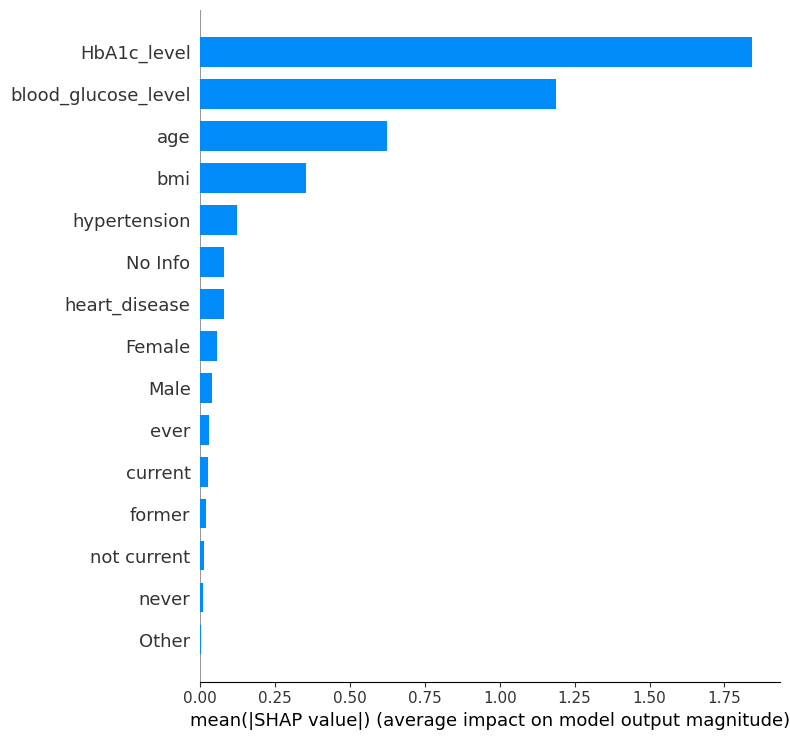

In [93]:
import shap

explainer = shap.TreeExplainer(cb_bayes.best_estimator_)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type='bar')

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


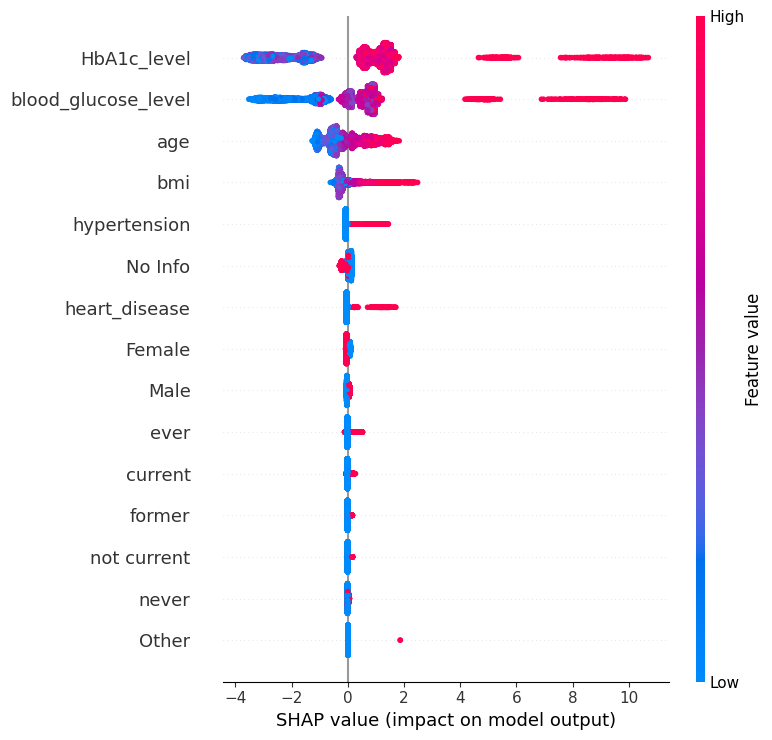

In [94]:
shap.summary_plot(shap_values, X_test)

In [88]:
diabetes_X['diabetes_probability'] = cb_bayes.predict_proba(diabetes_X)[:, 1]
diabetes_X

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,Female,Male,Other,No Info,current,ever,former,never,not current,diabetes_probability
0,80,0,1,25.19,6.6,140,1,0,0,0,0,0,0,1,0,0.190266
1,54,0,0,27.32,6.6,80,1,0,0,1,0,0,0,0,0,0.000371
2,28,0,0,27.32,5.7,158,0,1,0,0,0,0,0,1,0,0.001455
3,36,0,0,23.45,5.0,155,1,0,0,0,1,0,0,0,0,0.000168
4,76,1,1,20.14,4.8,155,0,1,0,0,1,0,0,0,0,0.006950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80,0,0,27.32,6.2,90,1,0,0,1,0,0,0,0,0,0.000805
99996,2,0,0,17.37,6.5,100,1,0,0,1,0,0,0,0,0,0.000558
99997,66,0,0,27.83,5.7,155,0,1,0,0,0,0,1,0,0,0.176880
99998,24,0,0,35.42,4.0,100,1,0,0,0,0,0,0,1,0,0.000432
